In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN().to(device)
model.load_state_dict(torch.load("mnist_cnn.pth", map_location=device))
model.eval()


CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
!pip install ipywidgets


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
canvas = np.zeros((28, 28))

buttons = [[widgets.ToggleButton(
    value=False,
    layout=widgets.Layout(width='15px', height='15px'),
    button_style=''
) for _ in range(28)] for _ in range(28)]

grid = widgets.VBox([
    widgets.HBox(row) for row in buttons
])

display(grid)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

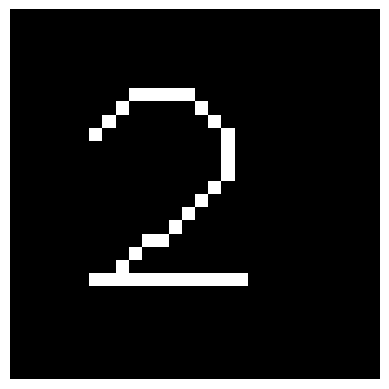

In [ ]:
def get_canvas():
    for i in range(28):
        for j in range(28):
            canvas[i, j] = 1.0 if buttons[i][j].value else 0.0
    return canvas

plt.imshow(get_canvas(), cmap="gray")
plt.axis("off")


In [ ]:
import torch

def predict():
    img = torch.tensor(get_canvas(), dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0).to(device)

    with torch.no_grad():
        pred = model(img).argmax(1).item()

    print("🎯 Predicted Digit:", pred)

predict()


🎯 Predicted Digit: 2
